In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_lines import IAMLines

In [2]:
!ulimit -n 65000

In [6]:
dataset = IAMLines(augment=False)
dataset.prepare_data()
dataset.setup()
print(dataset)

IAM Lines dataset
Num classes: 83
Input dims: (1, 56, 1024)
Output dims: (89, 1)
Train/val/test sizes: 9116, 2279, 1958
Train Batch x stats: (torch.Size([128, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0329), tensor(0.1008), tensor(0.9529))
Train Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(81))
Test Batch x stats: (torch.Size([128, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0274), tensor(0.0882), tensor(0.9059))
Test Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(82))



In [7]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in y if i != 3])

convert_y_label_to_string(dataset.data_train[0][1])

'<s>Mr. Brown, passionate and warm-hearted,</s>'

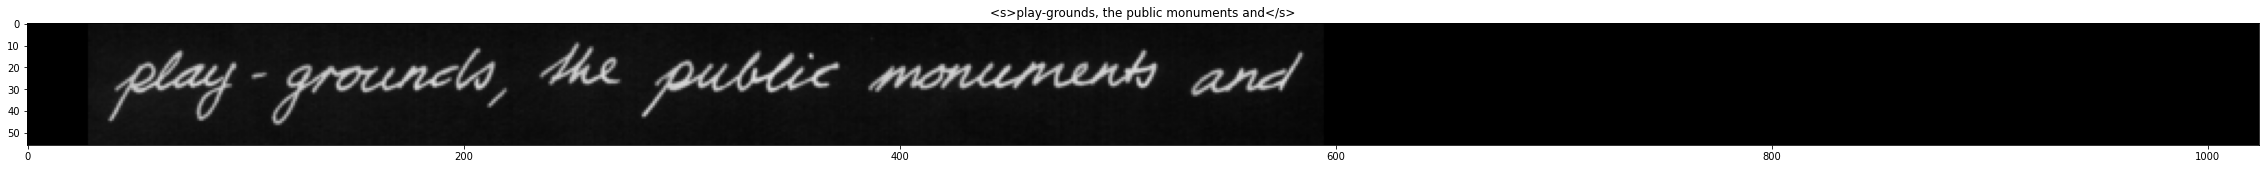

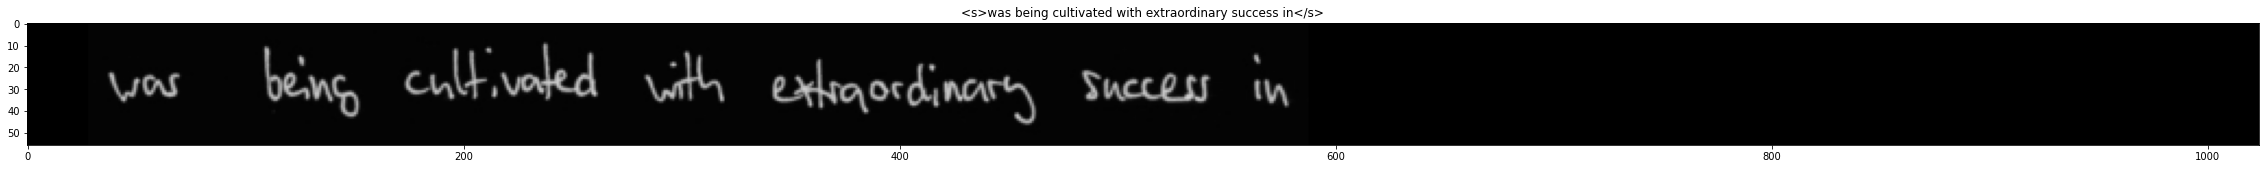

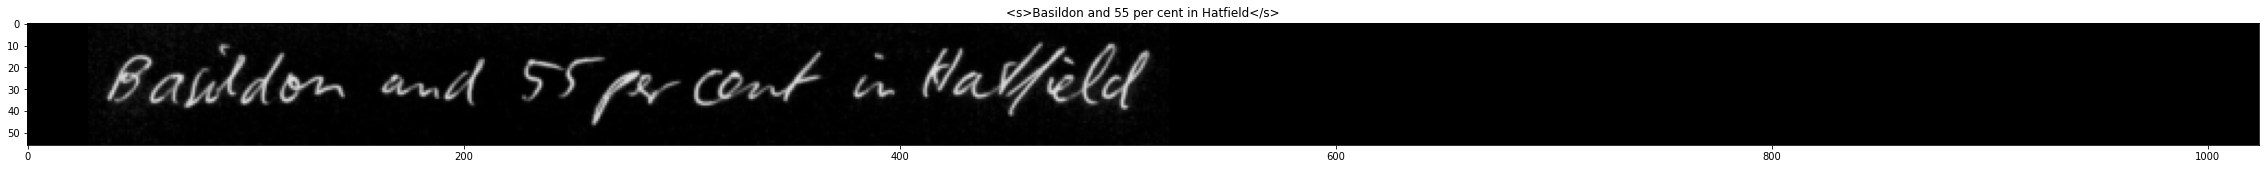

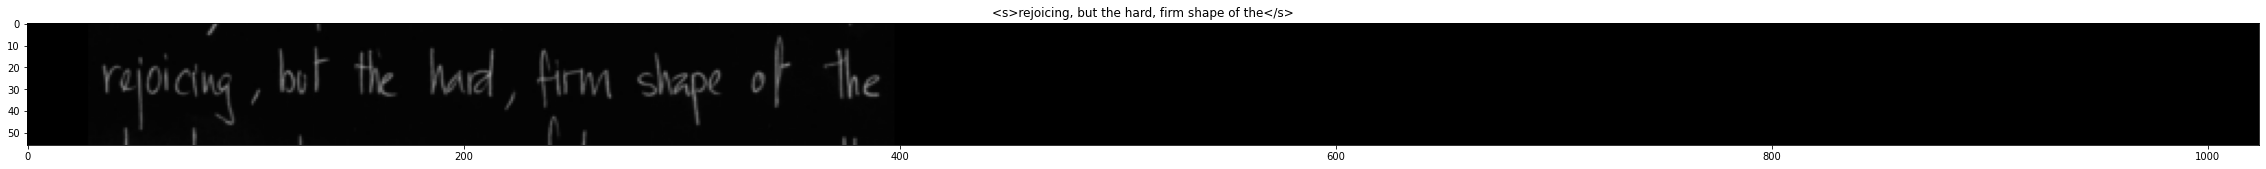

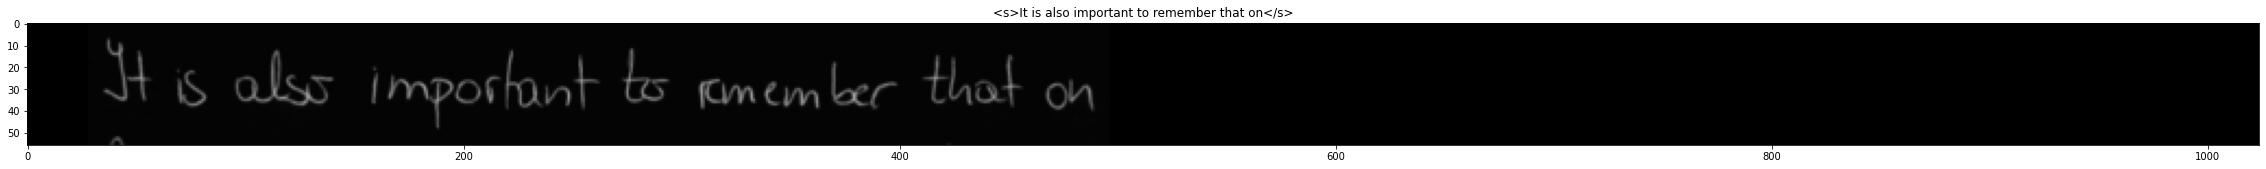

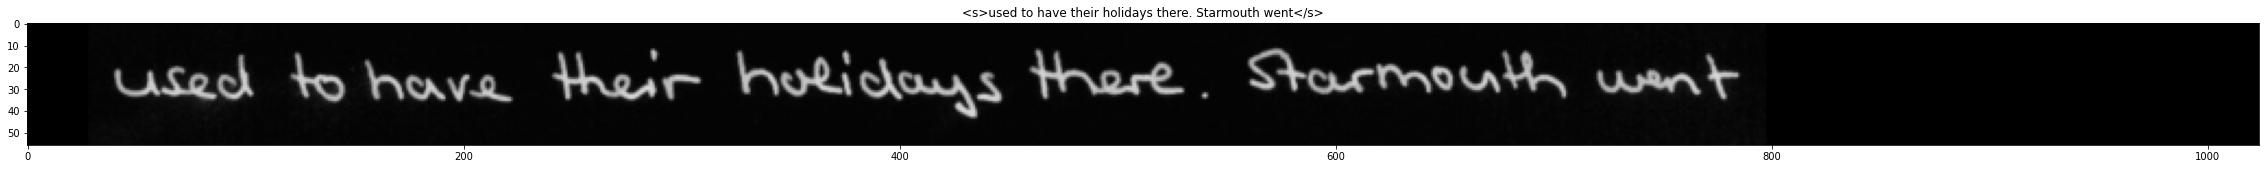

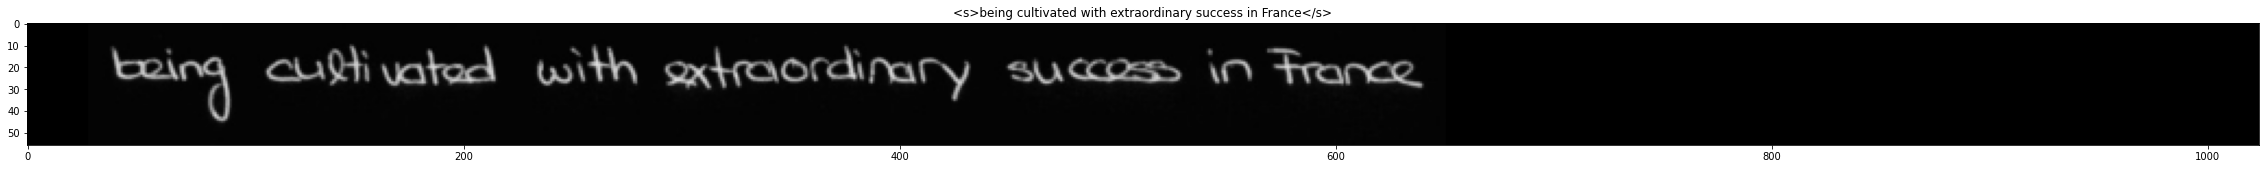

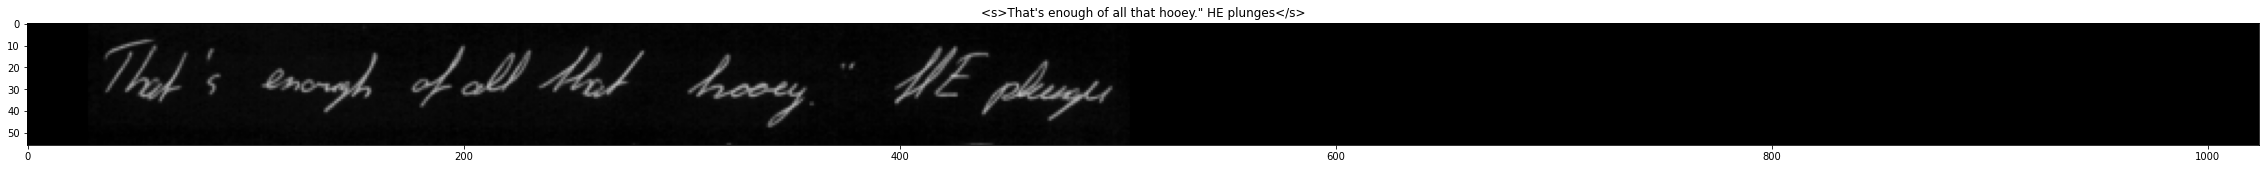

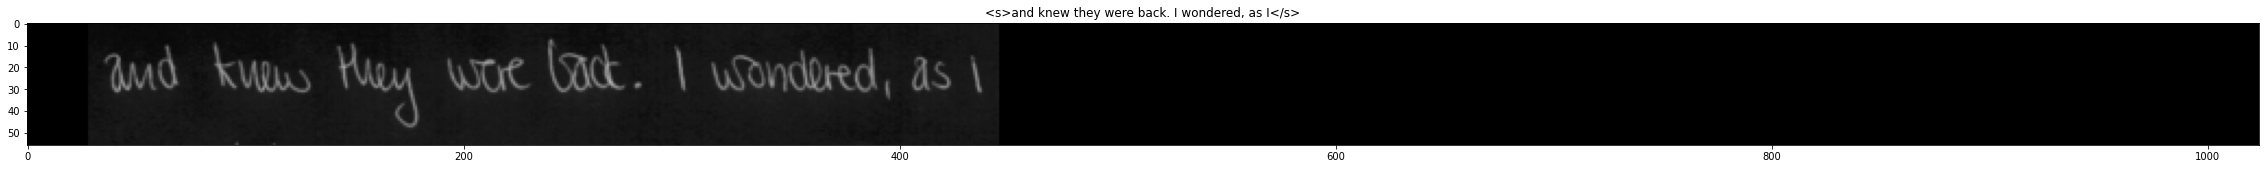

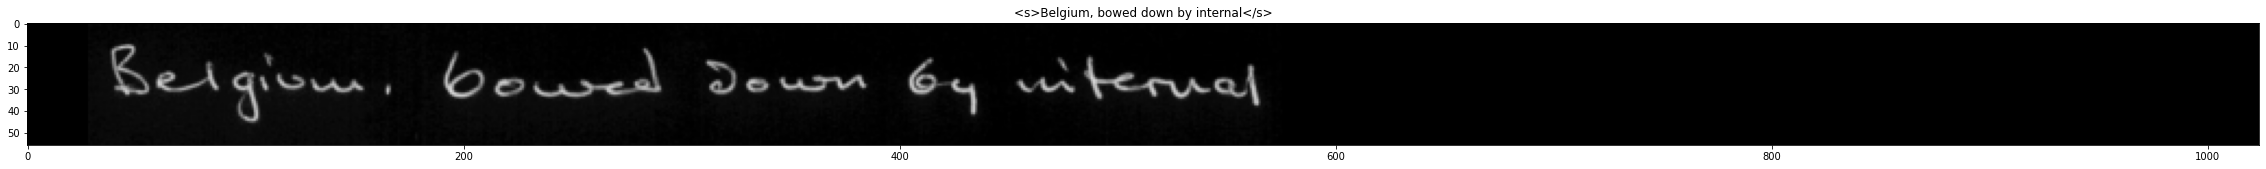

In [8]:
X, Y = next(iter(dataset.train_dataloader()))
for i in range(10):
    plt.figure(figsize=(40, 20))
    x, y = X[i], Y[i]
    sentence = convert_y_label_to_string(y)
    plt.imshow(x.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(sentence)